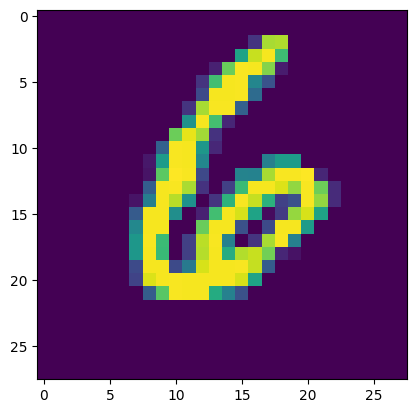

In [6]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data()
plt.imshow(x_treinamento[13])

AxesImage(shape=(28, 28))
Text(0.5, 1.0, 'Classe 5')


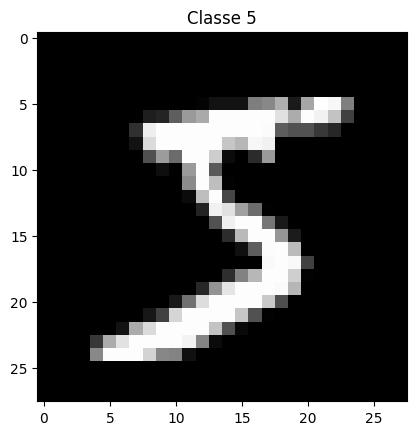

In [7]:
print(plt.imshow(X_treinamento[0], cmap = 'gray'))
print(plt.title('Classe ' + str(y_treinamento[0])))

In [8]:
previsores_treinamento = x_treinamento.reshape(x_treinamento.shape[0], 28, 28, 1)
previsores_teste = x_teste.reshape(x_teste.shape[0], 28, 28, 1)
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

previsores_treinamento /= 255
previsores_teste /= 255

In [9]:
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)
print(previsores_treinamento[13])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [11]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))
classificador.add(Conv2D(32, (3,3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 10, activation = 'softmax'))
classificador.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 128, epochs = 10, validation_data = (previsores_teste, classe_teste))

Epoch 1/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0371 - val_accuracy: 0.9919
Epoch 2/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.0366 - val_accuracy: 0.9919
Epoch 3/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0361 - val_accuracy: 0.9908
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.0432 - val_accuracy: 0.9912
Epoch 5/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0446 - val_accuracy: 0.9913
Epoch 6/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.0462 - val_accuracy: 0.9903
Epoch 7/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.0440 - val_accuracy:

In [23]:
model = classificador.to_json()
with open('model.json', 'w') as a:
    a.write(model)

classificador.save_weights('model.h5')